In [ ]:
### ValDXer testing
import os
os.environ['HDXER_PATH'] = '/home/alexi/Documents/HDXer'


In [ ]:

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings(name='test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange')
settings.replicates = 2
settings.gamma_range = (2,10)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.stride = 1000
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MD_Simulated"


In [ ]:
import os
print(os.getenv('HDXER_PATH'))


In [ ]:
print(os.environ["HDXER_PATH"])
print(__name__)

In [ ]:
import subprocess
from ValDX.helpful_funcs import conda_to_env_dict

# Assuming settings.HDXer_env contains the name of your Conda environment
env_path = conda_to_env_dict(settings.HDXer_env)

command = "echo $HDXER_PATH"
print("command:", command)

# Run the command in the subprocess
output = subprocess.run(command, shell=True, env=env_path, capture_output=True, text=True)

# Capture and print the standard output (stdout)
hdxer_path = output.stdout.strip()  # .strip() removes any trailing newline
print("HDXER_PATH:", hdxer_path)


In [ ]:
# BPTI data
BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"



In [ ]:
expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

os.listdir(expt_dir)

segs_name = "BPTI_residue_segs.txt"
segs_path = os.path.join(expt_dir, segs_name)

hdx_name = "BPTI_expt_dfracs.dat"
hdx_path = os.path.join(expt_dir, hdx_name)
print(hdx_path)

rates_name = "BPTI_Intrinsic_rates.dat"
rates_path = os.path.join(expt_dir, rates_name)


In [ ]:

VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)


In [ ]:
print(VDX.rates)

In [ ]:
print(VDX.paths)


In [ ]:
SHAW_dir = "/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein"

dir_list = os.listdir(SHAW_dir)

dcd_list = [i for i in dir_list if i.endswith(".dcd")]
# remove any with small in name
dcd_list = [i for i in dcd_list if not "_str" in i]

dcd_list.sort()
print(dcd_list)
print(len(dcd_list))

In [ ]:
sim_name = "BPTI_SHAW"
top_name = "bpti-protein.pdb"
top_path = os.path.join(SHAW_dir, top_name)
reps = len(dcd_list)
# reps =100

traj_paths = [os.path.join(SHAW_dir, i) for i in dcd_list[:reps]]
print(top_path)
print(traj_paths)


# VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=sim_name)

In [ ]:
import MDAnalysis as mda
from MDAnalysis.coordinates.DCD import DCDWriter  # Import DCDWriter directly

small_traj_paths = []

for rep in range(len(traj_paths)):
    traj = traj_paths[rep]
    u = mda.Universe(top_path, traj)
    print(u.trajectory.n_frames)

    # sample by stride settings.stide

    small_traj_name = traj.replace(".dcd", f"_str{settings.stride}.dcd")

    # Create an AtomGroup from the Universe's selection
    ag = u.select_atoms('all')

    # write traj
    with DCDWriter(small_traj_name, ag.n_atoms) as writer:
        for ts in u.trajectory[::settings.stride]:
            writer.write(ag)

    small_traj_paths.append(small_traj_name)

In [ ]:
print((traj_paths))

In [ ]:
VDX.load_structures(top_path=top_path, traj_paths=small_traj_paths, calc_name=test_name)


In [ ]:
VDX.paths

In [ ]:
train_dfs, val_dfs, train_gammas, val_gammas = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)

In [ ]:
VDX.save_experiment()

dump = train_dfs, val_dfs, train_gammas, val_gammas

import pickle
with open(f'dump_{VDX.name}.pickle', 'wb') as f:
    print(f"Saving pickle", f'dump_{VDX.name}.pickle')
    pickle.dump(dump, f)

In [ ]:
break

In [1]:

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings()
# settings.replicates = 3
# settings.gamma_range = (2,10)
# settings.train_frac = 0.8
# settings.RW_exponent = [0]
# settings.stride = 1000
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MD_Simulated"


/home/alexi/Documents/ValDX


/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name VDX already exists. Attempting to change name to VDX0
Experiment name VDX already exists. Attempting to change name to VDX1
Experiment name VDX already exists. Attempting to change name to VDX2
Experiment name VDX already exists. Attempting to change name to VDX3


In [2]:
VDX = VDX.load_experiment(load_path='logs/test_full0.5_celeste_stride100_413_5reps_bigEXPrange6_1706046605.pkl')

Attempting to load experiment from:  logs/test_full0.5_celeste_stride100_413_5reps_bigEXPrange6_1706046605.pkl
Loading experiment from:  logs/test_full0.5_celeste_stride100_413_5reps_bigEXPrange6_1706046605.pkl


['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
159  0.18270  0.70124  0.99999  1.00000        3  val_MD_Simulated_3
160  0.00099  0.00594  0.05786  0.51092        4  val_MD_Simulated_3
161  0.00177  0.01053  0.10042  0.71914        5  val_MD_Simulated_3
162  0.10567  0.48765  0.99875  1.00000        6  val_MD_Simulated_3
163  0.03174  0.17566  0.85510  1.00000        7  val_MD_Simulated_3

[164 rows x

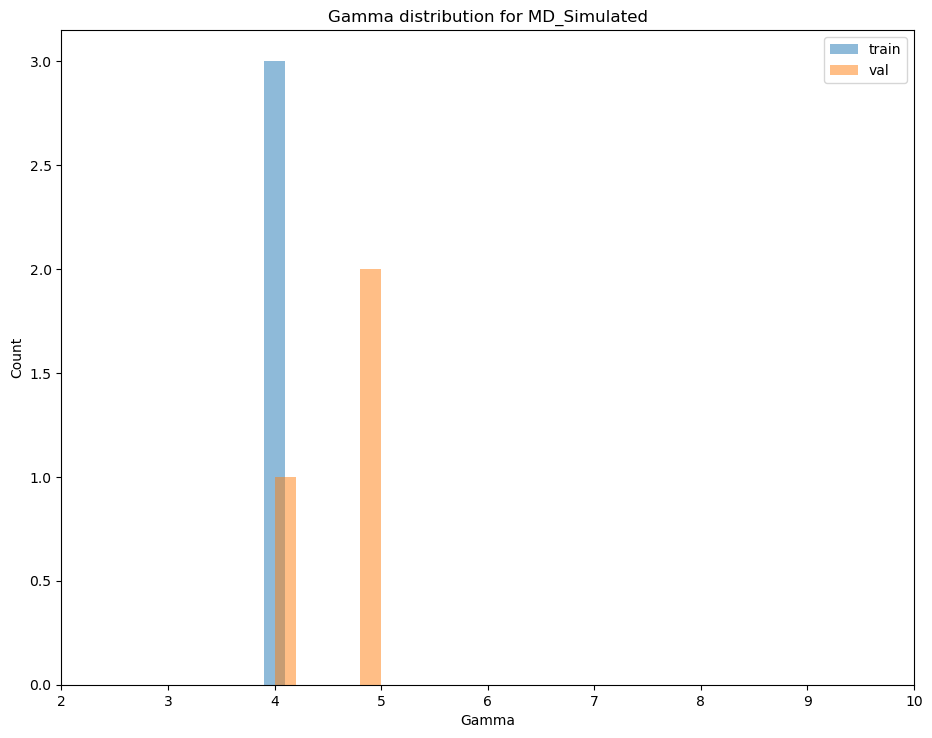

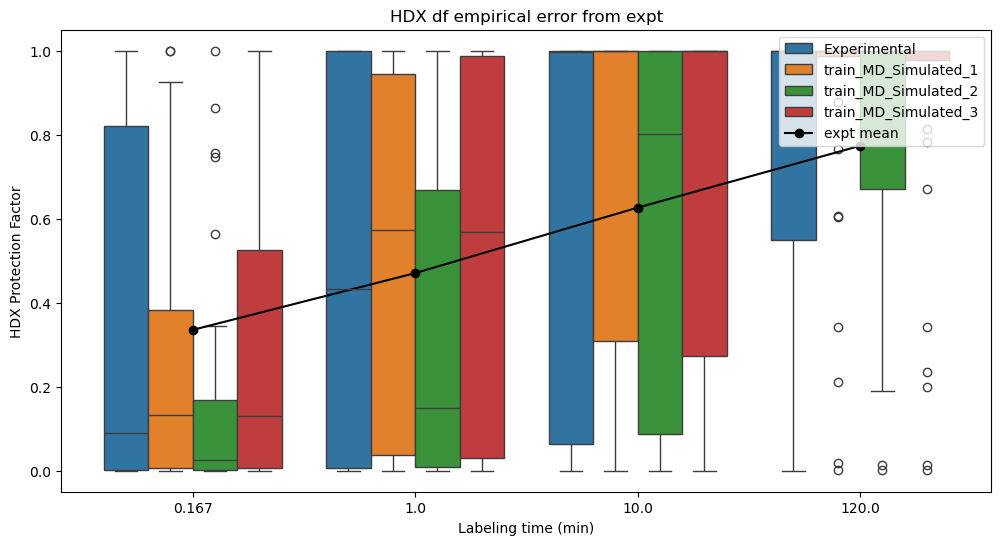

plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
159  0.18270  0.70124  0.99999  1.00000        3  val_MD_Simulated_3
160  0.00099  0.00594  0.05786  0.51092        4  val_MD_Simulated_3
161  0.00177  0.01053  0.10042  0.71914        5  val_MD_Simulated_3
162  0.10567  0.48765  0.99875  1.00000        6  val_MD_Simulated_3
163  0.03174  0.17566  0.85510  1.00000        7  val_MD_Simulated_3

[164 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.99996  1.00000        0  Experimental
1   

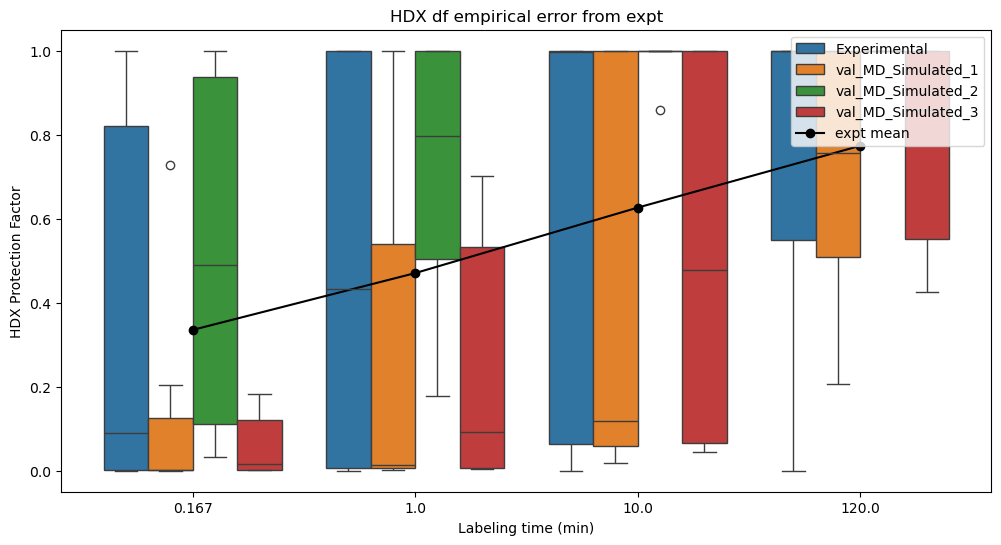

train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0, 27, 5, 11, 1, 30, 21, 2, 31, 37, 3, 36, 23, 33]
val_rep_peptides [7, 10, 14, 18, 20, 22, 28, 38]
train_rep_peptides [14, 5, 20, 26, 6, 24, 7, 29, 22, 38, 9, 13, 10, 31, 36, 8, 12, 37, 19, 40, 33, 32, 28, 34, 15, 1, 25, 11, 35, 18, 3, 39, 23]
val_rep_peptides [0, 2, 4, 16, 17, 21, 27, 30]
train_rep_peptides [33, 5, 11, 15, 36, 12, 16, 28, 18, 34, 27, 17, 26, 8, 2, 9, 19, 10, 0, 24, 30, 14, 1, 37, 4, 21, 13, 6, 29, 31, 7, 39, 25]
val_rep_peptides [3, 20, 22, 23, 32, 35, 38, 40]
manual merge df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00033  0.00197  0.01956  0.21106       24  train_MD_Simulated_1
1    0.00058  0.00350  0.03443  0.34325       13  train_MD_Simulated_1
2    0.01156  0.06725  0.

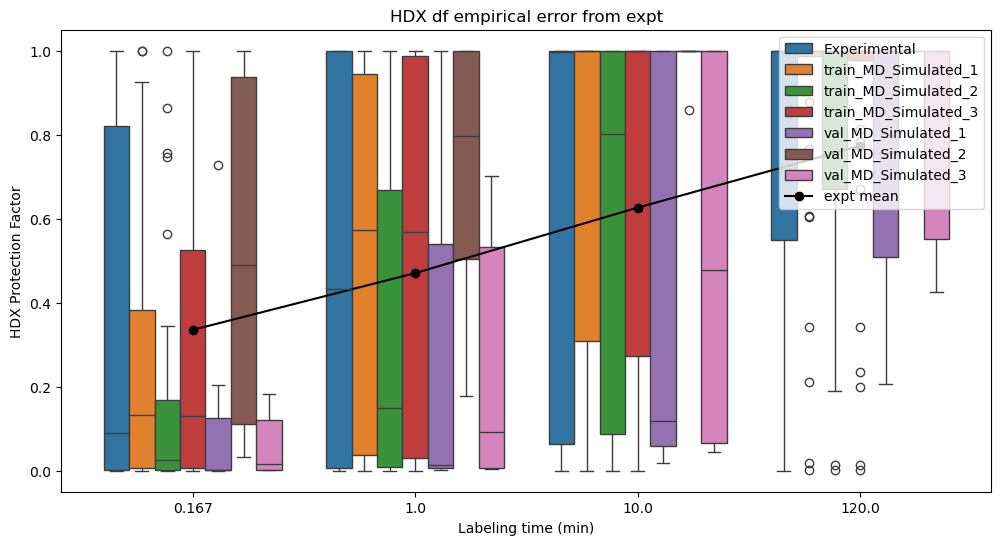

plotting paired errors
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
159  0.18270  0.70124  0.99999  1.00000       23  val_MD_Simulated_3
160  0.00099  0.00594  0.05786  0.51092       32  val_MD_Simulated_3
161  0.00177  0.01053  0.10042  0.71914       35  val_MD_Simulated_3
162  0.10567  0.48765  0.99875  1.00000       38  val_MD_Simulated_3
163  0.03174  0.17566  0.85510  1.00000       40  val_MD_Simulated_3

[164 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


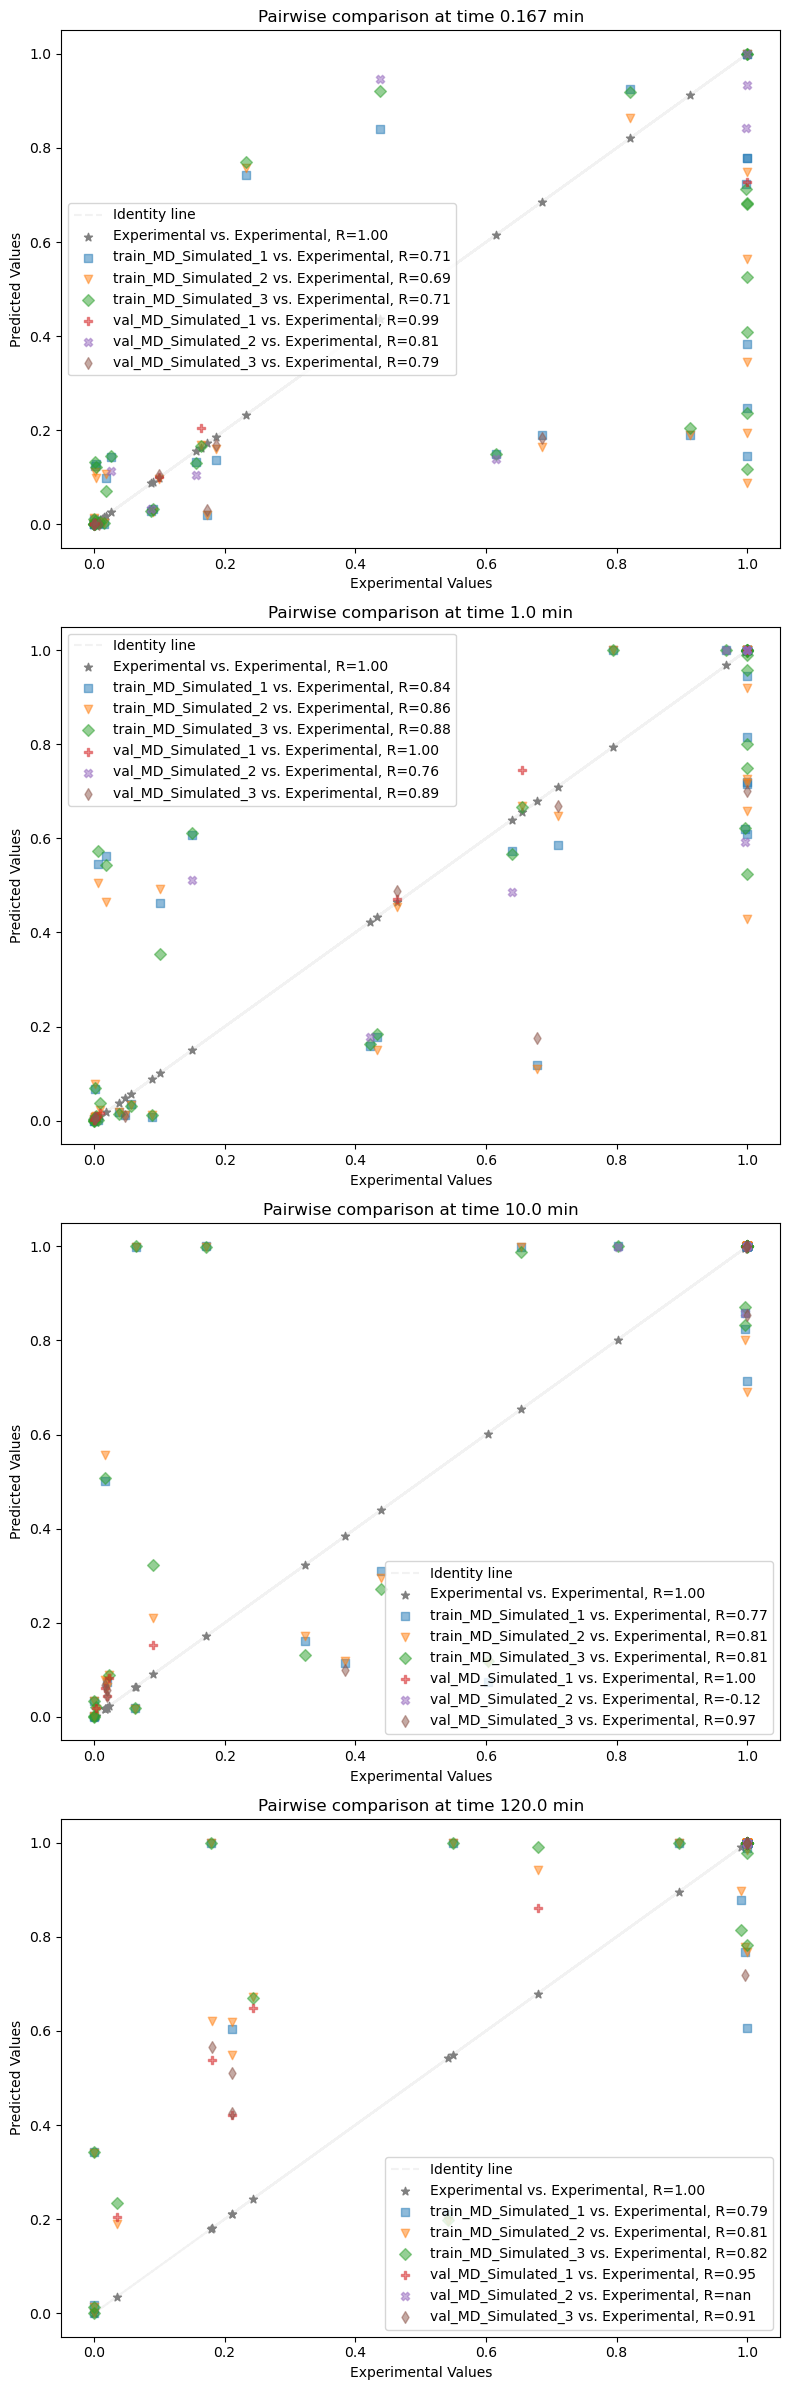

plotting paired trainval agreement
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
159  0.18270  0.70124  0.99999  1.00000       23  val_MD_Simulated_3
160  0.00099  0.00594  0.05786  0.51092       32  val_MD_Simulated_3
161  0.00177  0.01053  0.10042  0.71914       35  val_MD_Simulated_3
162  0.10567  0.48765  0.99875  1.00000       38  val_MD_Simulated_3
163  0.03174  0.17566  0.85510  1.00000       40  val_MD_Simulated_3

[164 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0,

/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1340: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["Time", "R", "calc_name"])])
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1359: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFram

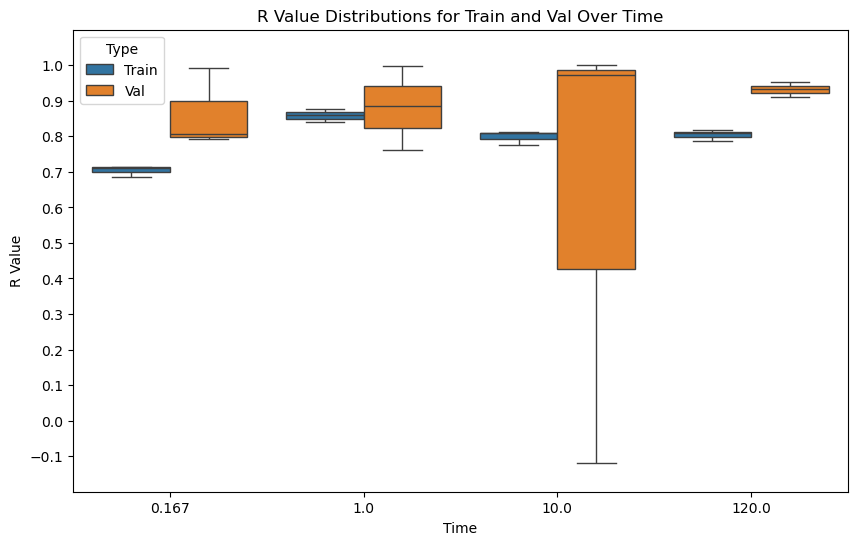

nan_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00033  0.00197  0.01956  0.21106       24  train_MD_Simulated_1
1    0.00058  0.00350  0.03443  0.34325       13  train_MD_Simulated_1
2    0.01156  0.06725  0.50150  0.99976        8  train_MD_Simulated_1
3    0.00130  0.00775  0.07488  0.60703       25  train_MD_Simulated_1
4    0.99999  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
241  0.18270  0.70124  0.99999  1.00000       23    val_MD_Simulated_3
242  0.00099  0.00594  0.05786  0.51092       32    val_MD_Simulated_3
243  0.00177  0.01053  0.10042  0.71914       35    val_MD_Simulated_3
244  0.10567  0.48765  0.99875  1.00000       38    val_MD_Simulated_3
245  0.03174  0.17566  0.85510  1.00000       40    val_MD_Simulated_3

[246 rows x 6 columns]
nan_df + expt_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00033  0.00197  0.0195

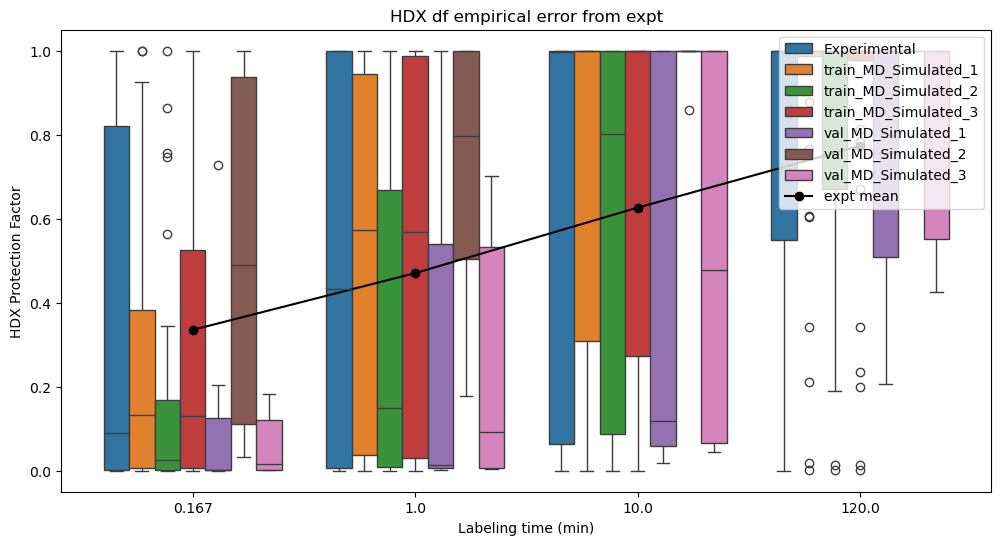

plot_dfracs_compare_abs
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00033  0.00197  0.01956  0.21106       24  train_MD_Simulated_1
1    0.00058  0.00350  0.03443  0.34325       13  train_MD_Simulated_1
2    0.01156  0.06725  0.50150  0.99976        8  train_MD_Simulated_1
3    0.00130  0.00775  0.07488  0.60703       25  train_MD_Simulated_1
4    0.99999  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
282  0.00963  0.05627  0.43963  0.99904       36          Experimental
283  0.01757  0.10068  0.65396  1.00000       37          Experimental
284  0.09888  0.46390  0.99804  1.00000       38          Experimental
285  0.00650  0.03831  0.32339  0.99079       39          Experimental
286  0.17259  0.67841  0.99999  1.00000       40          Experimental

[287 rows x 6 columns]
       0.167      1.0     10.0    120.0  peptide     calc_name
246  0.15669  0.63957  0.99996  1.000

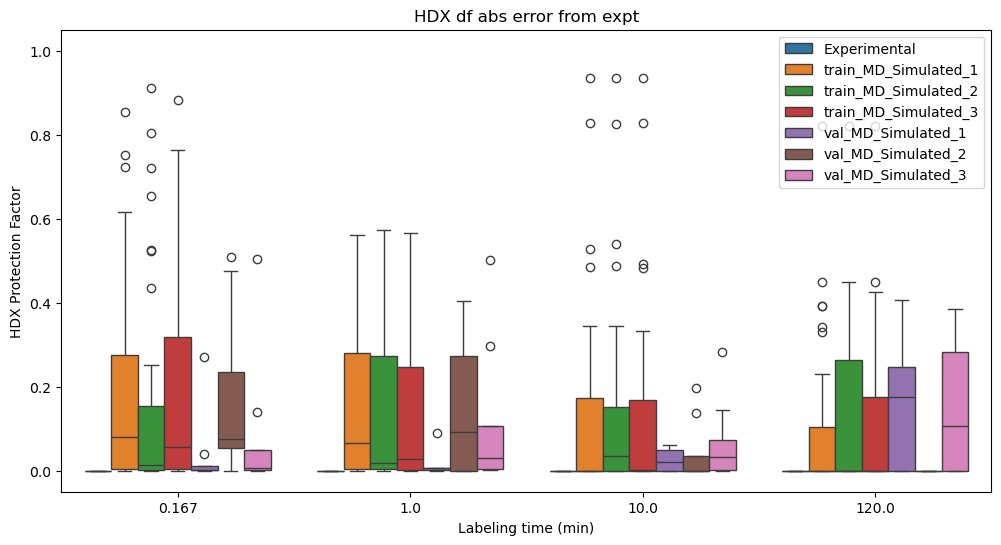

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00033  0.00197  0.01956  0.21106       24  train_MD_Simulated_1
1    0.00058  0.00350  0.03443  0.34325       13  train_MD_Simulated_1
2    0.01156  0.06725  0.50150  0.99976        8  train_MD_Simulated_1
3    0.00130  0.00775  0.07488  0.60703       25  train_MD_Simulated_1
4    0.99999  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
282  0.00963  0.05627  0.43963  0.99904       36          Experimental
283  0.01757  0.10068  0.65396  1.00000       37          Experimental
284  0.09888  0.46390  0.99804  1.00000       38          Experimental
285  0.00650  0.03831  0.32339  0.99079       39          Experimental
286  0.17259  0.67841  0.99999  1.00000       40          Experimental

[287 rows x 6 columns]
       0.167      1.0     10.0    120.0  peptide     calc_name
246  0.15669  0.63957  0.99996  1.000

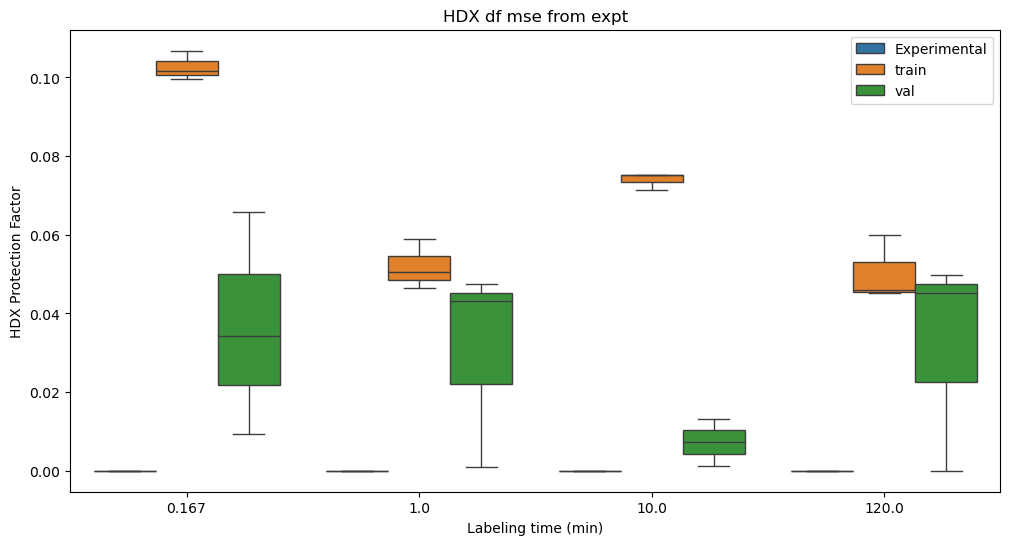

plotting paired errors
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00033  0.00197  0.01956  0.21106       24  train_MD_Simulated_1
1    0.00058  0.00350  0.03443  0.34325       13  train_MD_Simulated_1
2    0.01156  0.06725  0.50150  0.99976        8  train_MD_Simulated_1
3    0.00130  0.00775  0.07488  0.60703       25  train_MD_Simulated_1
4    0.99999  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
282  0.00963  0.05627  0.43963  0.99904       36          Experimental
283  0.01757  0.10068  0.65396  1.00000       37          Experimental
284  0.09888  0.46390  0.99804  1.00000       38          Experimental
285  0.00650  0.03831  0.32339  0.99079       39          Experimental
286  0.17259  0.67841  0.99999  1.00000       40          Experimental

[287 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-0

/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


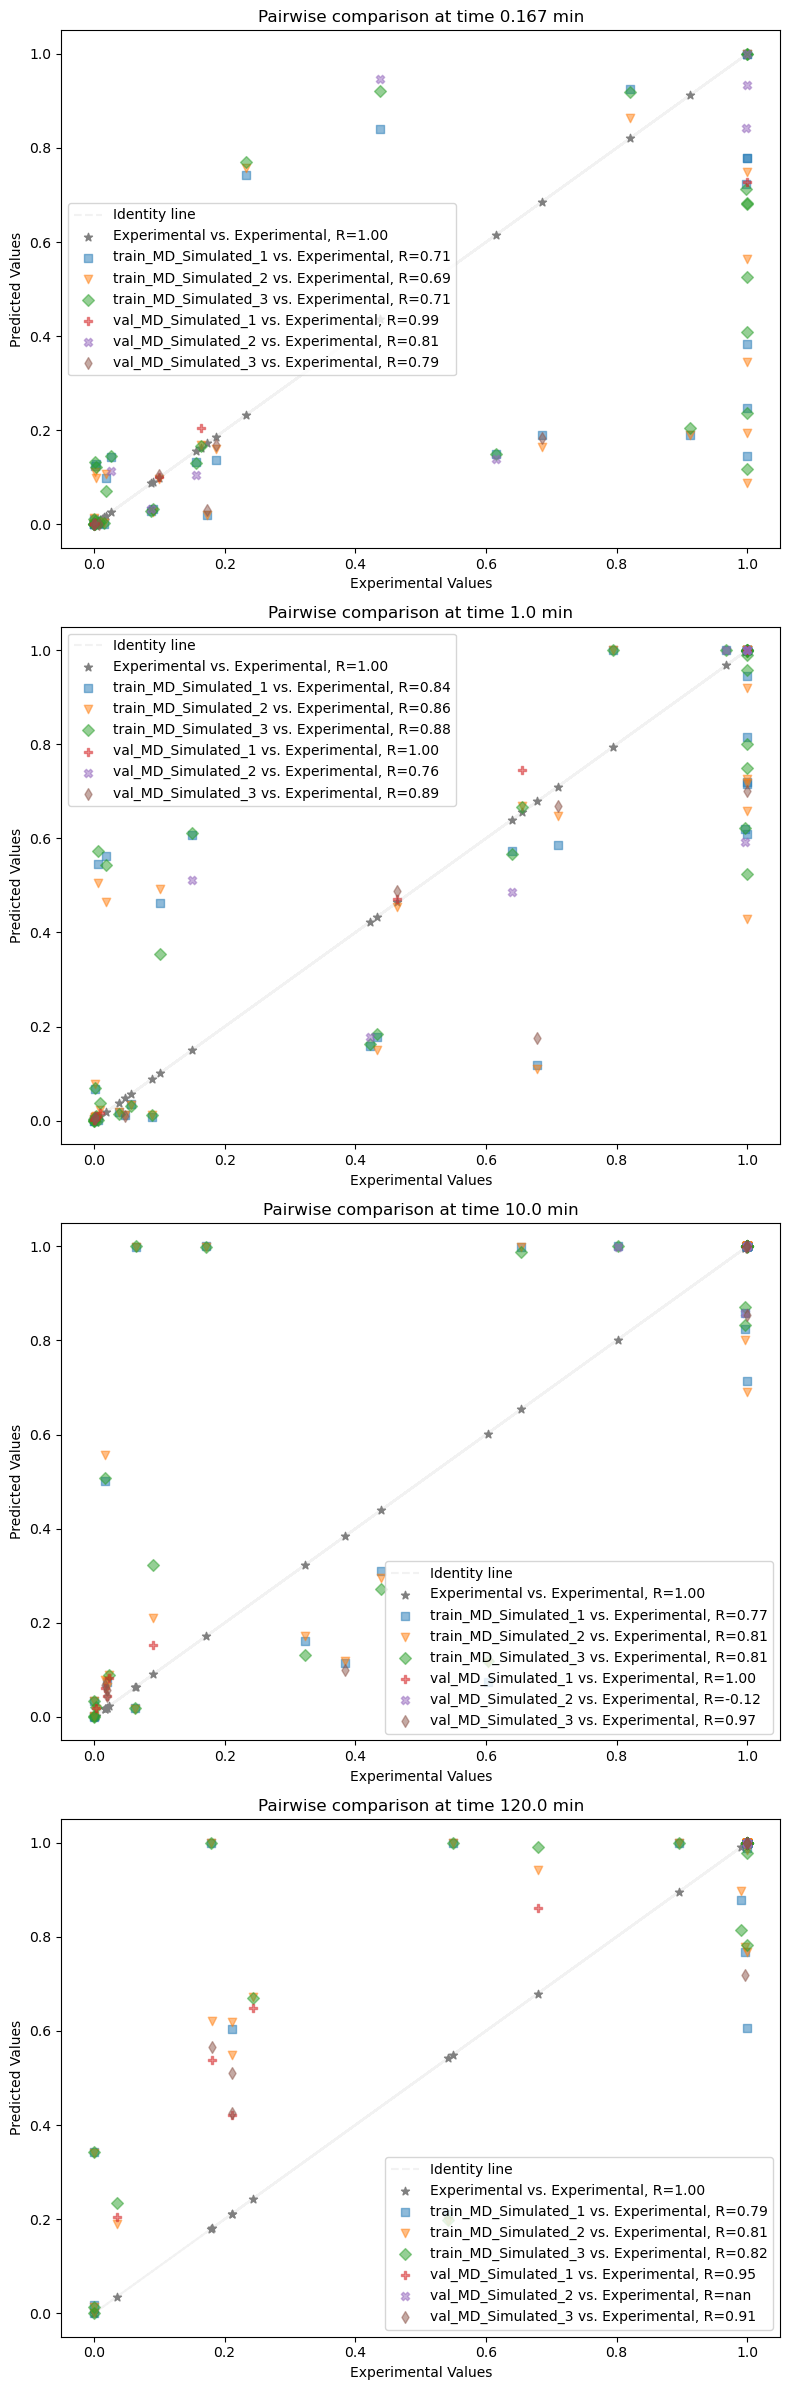

Train coverage: 100.00
Val coverage: 51.22
plot_dfracs_compare
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
158  0.72819  0.99959  1.00000    1.0        7  val_MD_Simulated_avg
159  0.84287  0.99998  1.00000    1.0       30  val_MD_Simulated_avg
160  0.93436  1.00000  1.00000    1.0       27  val_MD_Simulated_avg
161  0.94627  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
162  0.99875  1.00000  1.00000    1.0        4  val_MD_Simulated_avg

[163 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0

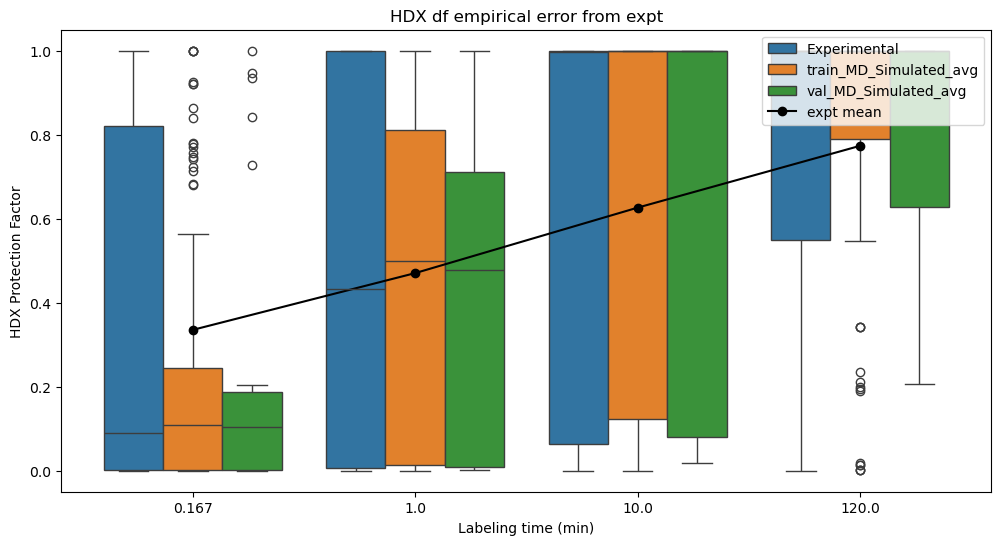

plotting paired errors
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
158  0.72819  0.99959  1.00000    1.0        7  val_MD_Simulated_avg
159  0.84287  0.99998  1.00000    1.0       30  val_MD_Simulated_avg
160  0.93436  1.00000  1.00000    1.0       27  val_MD_Simulated_avg
161  0.94627  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
162  0.99875  1.00000  1.00000    1.0        4  val_MD_Simulated_avg

[163 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

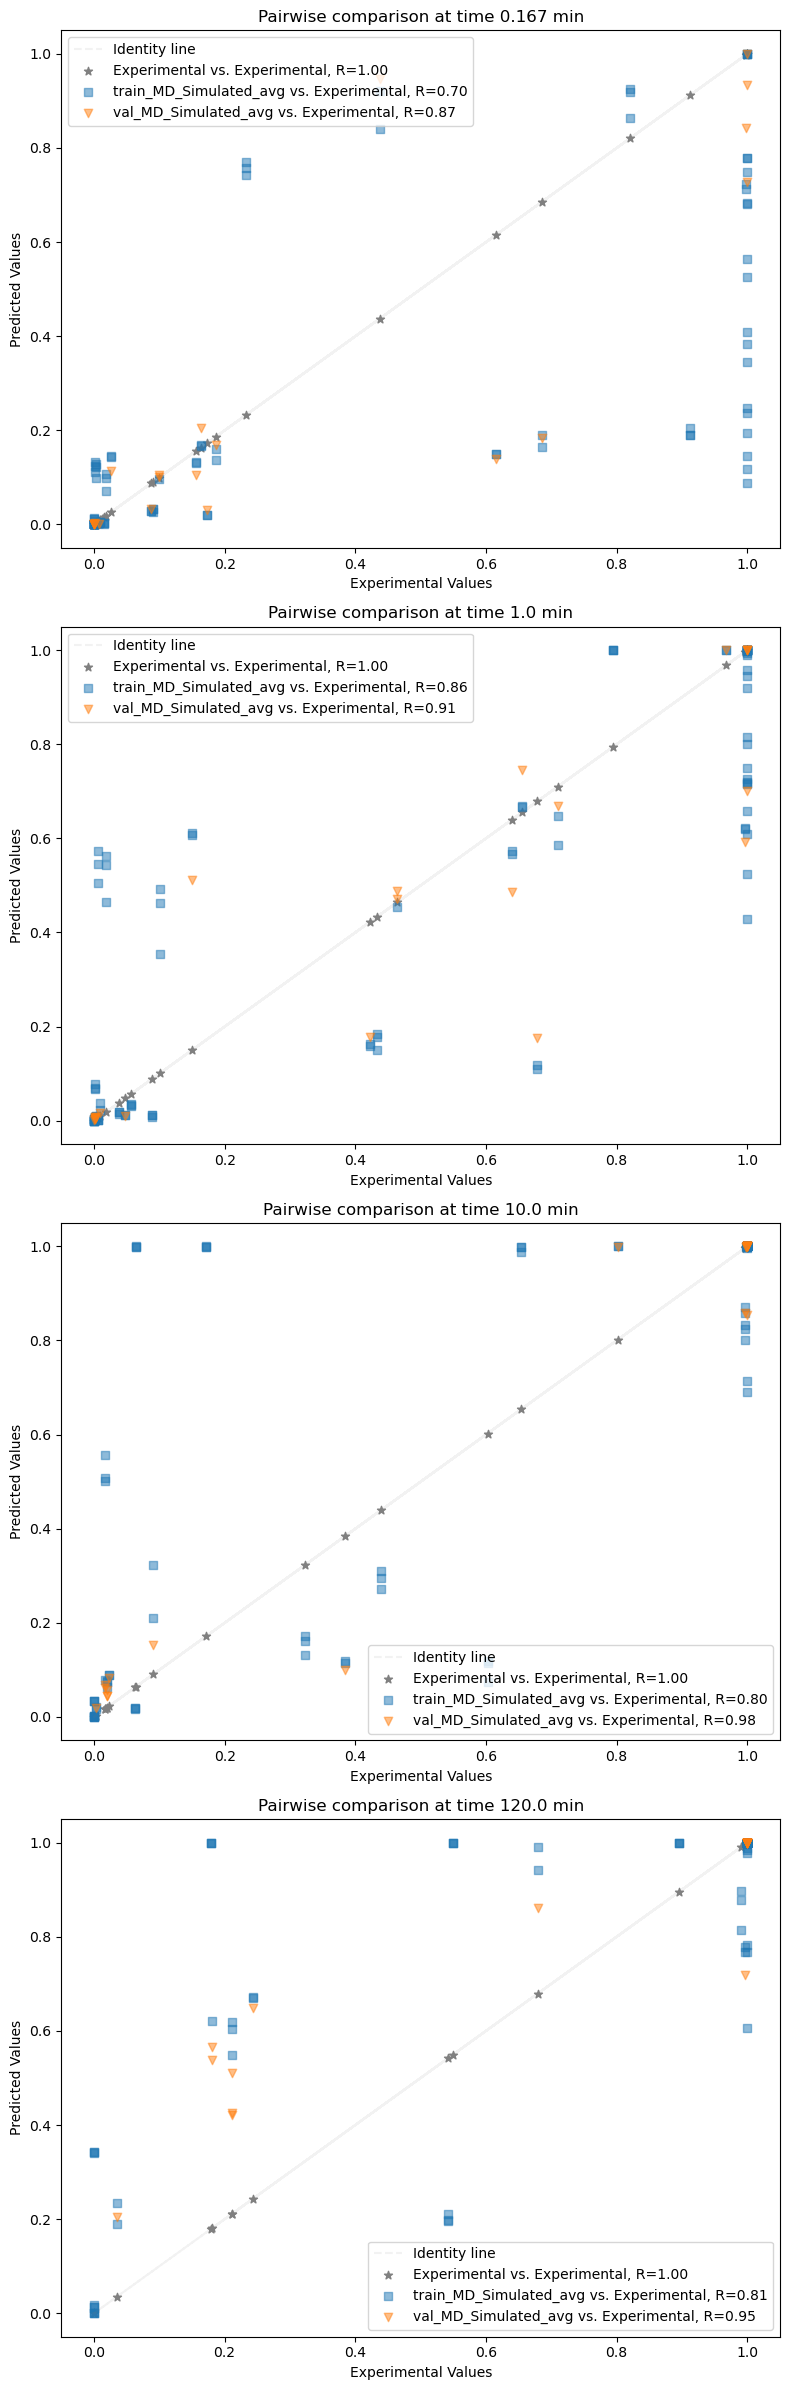

In [3]:
with open('dump_test_full0.5_celeste_stride100_413_5reps_bigEXPrange6.pickle', 'rb') as f:
    dump = pickle.load(f)

train_dfs, val_dfs, train_gammas, val_gammas = dump

VDX.evaluate_HDX(train_dfs=train_dfs, 
                 val_dfs=val_dfs, 
                 calc_name=test_name,
                 expt_name=expt_name,
                 train_gammas=train_gammas, 
                 val_gammas=val_gammas, 
                 n_reps=VDX.settings.replicates,
                   )

In [ ]:
import pandas as pd

In [ ]:
# file_name = "covid_submissions_all_info.csv"

In [ ]:
# sub_test = pd.read_csv(file_name)

In [ ]:
# sub_test.columns.to_list()